In [1]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx

## TextRank algorithm artitecture

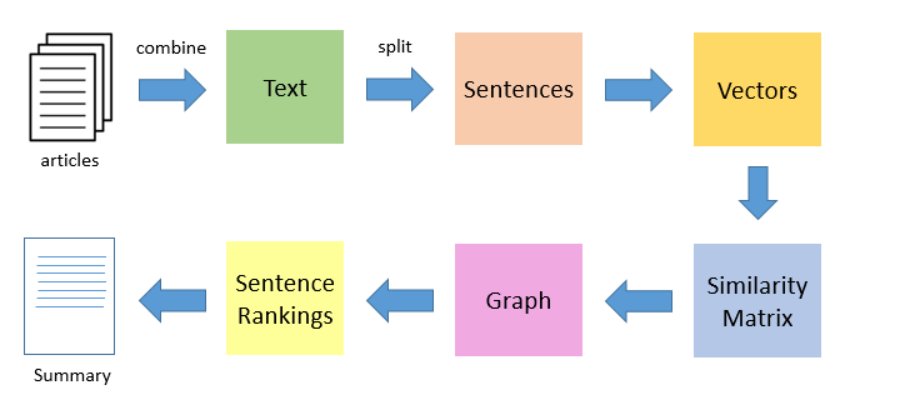

In [9]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx
import string

# Function to read and preprocess the text
def read_text(text):
    sentences = sent_tokenize(text)
    clean_sentences = [sent.lower() for sent in sentences]

    # Removing stopwords and punctuation
    stop_words = set(stopwords.words('english') + list(string.punctuation))
    cleaned_text = []
    for sent in clean_sentences:
        words = word_tokenize(sent)
        words = [word for word in words if word not in stop_words]
        cleaned_text.append(' '.join(words))
    return cleaned_text

# Function to calculate similarity matrix
def build_similarity_matrix(cleaned_text):
    similarity_matrix = np.zeros((len(cleaned_text), len(cleaned_text)))
    for i in range(len(cleaned_text)):
        for j in range(len(cleaned_text)):
            if i != j:
                similarity_matrix[i][j] = sentence_similarity(cleaned_text[i], cleaned_text[j])
    return similarity_matrix

# Function to calculate similarity between sentences
def sentence_similarity(sent1, sent2):
    vector1 = set(sent1.split())
    vector2 = set(sent2.split())
    intersection = vector1.intersection(vector2)
    return len(intersection) / (np.log(len(vector1)) + np.log(len(vector2)) + 1)


# Function to generate summary using TextRank algorithm
def generate_summary(text, num_sentences=3):
    cleaned_text = read_text(text)
    similarity_matrix = build_similarity_matrix(cleaned_text)

    # Create a graph representation
    graph = nx.from_numpy_array(similarity_matrix)
    scores = nx.pagerank(graph)

    # Sort sentences by score
    ranked_sentences = sorted(((scores[i], sent) for i, sent in enumerate(cleaned_text)), reverse=True)

    # Get top sentences
    top_sentences = [sent for score, sent in ranked_sentences[:num_sentences]]

    return ' '.join(top_sentences)

# Example usage
text = """This project focuses on automating the task of text summarization using machine 
learning, specifically employing the TextRank algorithm. Text summarization involves 
condensing lengthy pieces of text while retaining essential information, and automation 
using machine learning is gaining traction in various applications, including text 
classification, question answering, legal text synthesis, news synthesis, and headline 
generation. """
summary = generate_summary(text)
print(summary)


text summarization involves condensing lengthy pieces text retaining essential information automation using machine learning gaining traction various applications including text classification question answering legal text synthesis news synthesis headline generation project focuses automating task text summarization using machine learning specifically employing textrank algorithm


In [7]:
summary = generate_summary(text)
print(summary)

text summarization involves condensing lengthy pieces text retaining essential information automation using machine learning gaining traction various applications including text classification question answering legal text synthesis news synthesis headline generation project focuses automating task text summarization using machine learning specifically employing textrank algorithm text summarization creates brief succinct summary original text


In [8]:
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def preprocess_text(text):
    sentences = sent_tokenize(text)
    word_tokens = [word_tokenize(sentence.lower()) for sentence in sentences]
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [[word for word in words if word not in stop_words and word.isalnum()] for words in word_tokens]
    stemmer = PorterStemmer()
    stemmed_tokens = [[stemmer.stem(word) for word in words] for words in filtered_tokens]
    return stemmed_tokens

def calculate_similarity_matrix(sentences):
    vocab = set()
    for words in sentences:
        vocab.update(words)
    vocab = list(vocab)
    vocab_index = {word: i for i, word in enumerate(vocab)}
    similarity_matrix = np.zeros((len(vocab), len(vocab)))

    for words in sentences:
        for i in range(len(words)):
            for j in range(len(words)):
                if i != j:
                    word1_index = vocab_index[words[i]]
                    word2_index = vocab_index[words[j]]
                    similarity_matrix[word1_index][word2_index] += 1

    return similarity_matrix

def textrank_summarize(text, num_sentences=2):
    preprocessed_text = preprocess_text(text)
    similarity_matrix = calculate_similarity_matrix(preprocessed_text)
    sentence_scores = np.sum(similarity_matrix, axis=1)
    ranked_sentences = [sentence for _, sentence in sorted(zip(sentence_scores, preprocessed_text), reverse=True)[:num_sentences]]
    return ' '.join([' '.join(words) for words in ranked_sentences])

# Example usage
text =  """This project focuses on automating the task of text summarization using machine 
learning, specifically employing the TextRank algorithm. Text summarization involves 
condensing lengthy pieces of text while retaining essential information, and automation 
using machine learning is gaining traction in various applications, including text 
classification, question answering, legal text synthesis, news synthesis, and headline 
generation. """
summary = textrank_summarize(text)
print(summary)


project focus autom task text summar use machin learn specif employ textrank algorithm text summar involv condens lengthi piec text retain essenti inform autom use machin learn gain traction variou applic includ text classif question answer legal text synthesi news synthesi headlin gener
